In [1]:
# import basic libraries 
import pandas as pd
import seaborn as sb
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize, sent_tokenize
from nltk import download
import itertools
import collections
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import re
import string

# read csv
df = pd.read_csv('../csv/data_clean.csv')
df_copy = df.copy()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lilmac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Sentiment Score

In [4]:
# save a copy
df_sent = df.copy()

In [9]:
#def clean_links(df_sent):
    #replace URL of a text
    #df_sent['text'] = df_sent['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
    
#clean_links(df_sent)
#df_sent['text']

<ipython-input-9-f3a6654e51bc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sent['text'] = df_sent['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


0                     Hang told me to add it in education
1       What improved my score was adding metrics of a...
2       I feel like a slave to this dumb Resume Worded...
3       Francisco, we have to remove the fancy/beautif...
4                                                 Ah, ok!
                              ...                        
4935                                Just saw this. Thanks
4936    I'll have a think. Need to develop a strategy ...
4937            heeeellppp…anyone? <@U01RSRE0N3D>? :eyes:
4938        I will have a look after the presentation :v:
4939    I quite like the Kaggle explanations. Been rea...
Name: text, Length: 4940, dtype: object

In [25]:
# change column dtype into string
df_sent['text'] = df_sent['text'].astype(str)

# change column to list
text_list = df_sent['text'].tolist()



#import libraries
from bs4 import BeautifulSoup # Text Cleaning
import re, string # Regular Expressions, String
from nltk.corpus import stopwords # stopwords
from nltk.stem.porter import PorterStemmer # for word stemming
from nltk.stem import WordNetLemmatizer # for word lemmatization
import unicodedata
import html

# set of stopwords to be removed from text
stop = set(stopwords.words('english'))

# update stopwords to have punctuation too
stop.update(list(string.punctuation))


# utility function for preprocessing the texts
def clean_text(text_list):
    
    # Remove unwanted html characters
    re1 = re.compile(r'  +')
    x1 = text_list.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
    'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
    '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
    ' @-@ ', '-').replace('\\', ' \\ ')
    text = re1.sub(' ', html.unescape(x1))
    
    # remove non-ascii characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # strip html
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove twitter tags
    text = text.replace("<@>", "")
    
    # remove hashtags
    text = text.replace("#", "")
    
    # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z ]', '', text)
    
    # remove stopwords from text
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip().lower())
    
    text = " ".join(final_text)
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()    
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    text = " ".join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    
    # replace all numbers with "num"
    text = re.sub("\d", "num", text)
    
    return text.lower()

In [26]:

# apply cleaning function
df_sent['prep_text'] = df_sent['text'].apply(clean_text)
df_sent['prep_text'].head(5)

0                              hang tell add education
1    improve score add metric achievement use synon...
2    feel like slave dumb resume word algorithm sim...
3        francisco remove fancybeautiful format upload
4                                                ah ok
Name: prep_text, dtype: object

In [59]:
# remove emojis
def remove_emoji(text_list):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text_list)

In [54]:
# save to excel
df_sent.to_excel(r'../csv/data_clean_topic_modelling.xlsx', index = False)
# save to csv
df_sent.to_csv(r'../csv/data_clean_topic_modelling.csv', index = False)

### Wordcloud

### First version

In [66]:
# import libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


wl = WordNetLemmatizer()
STOPWORDS = stopwords.words('english')

In [67]:
# utility function for preprocessing the texts
def preprocess_text(texts):
    corpus = list()
    for text in texts:
        text = re.sub(r'https?://\S+|www\.\S+','',text)    # removing website link if any present in the text 
        text = re.sub(r'[^a-zA-Z]', ' ', text)             # keeping only alphabetic characters
        text = text.lower()
        text = text.split()
        
        text = [wl.lemmatize(word) for word in text if not word in STOPWORDS]  # lemmatizing the words using wordnet lemmatizer
        text = " ".join(text)
        
        corpus.append(text)
    
    return corpus   

In [68]:
# apply function to columns
df_train['processed_text'] = preprocess_text(df_train['text'])
df_test['processed_text'] = preprocess_text(df_test['text'])

### Third version

In [70]:
#import libraries
from bs4 import BeautifulSoup # Text Cleaning
import re, string # Regular Expressions, String
from nltk.corpus import stopwords # stopwords
from nltk.stem.porter import PorterStemmer # for word stemming
from nltk.stem import WordNetLemmatizer # for word lemmatization
import unicodedata
import html

# set of stopwords to be removed from text
stop = set(stopwords.words('english'))

# update stopwords to have punctuation too
stop.update(list(string.punctuation))

def clean_text(text_list):
    
    # Remove unwanted html characters
    re1 = re.compile(r'  +')
    x1 = text_list.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
    'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
    '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
    ' @-@ ', '-').replace('\\', ' \\ ')
    text = re1.sub(' ', html.unescape(x1))
    
    # remove non-ascii characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # strip html
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove twitter tags
    text = text.replace("@", "")
    
    # remove hashtags
    text = text.replace("#", "")
    
    # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z ]', '', text)
    
    # remove stopwords from text
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip().lower())
    
    text = " ".join(final_text)
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()    
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    text = " ".join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    
    # replace all numbers with "num"
    text = re.sub("\d", "num", text)
    
    return text.lower()

In [71]:
# apply cleaning function
df_train['prep_text'] = df_train['text'].apply(clean_text)
df_train['prep_text'].head(5)

0                              hang tell add education
1    improve score add metric achievement use synon...
2    feel like slave dumb resume word algorithm sim...
3        francisco remove fancybeautiful format upload
4                                                ah ok
Name: prep_text, dtype: object

In [72]:
# save to excel
df_train.to_excel(r'../csv/data_clean_nlp_preprocessed.xlsx', index = False)
# save to csv
df_train.to_csv(r'../csv/data_clean_nlp_preprocessed.csv', index = False)

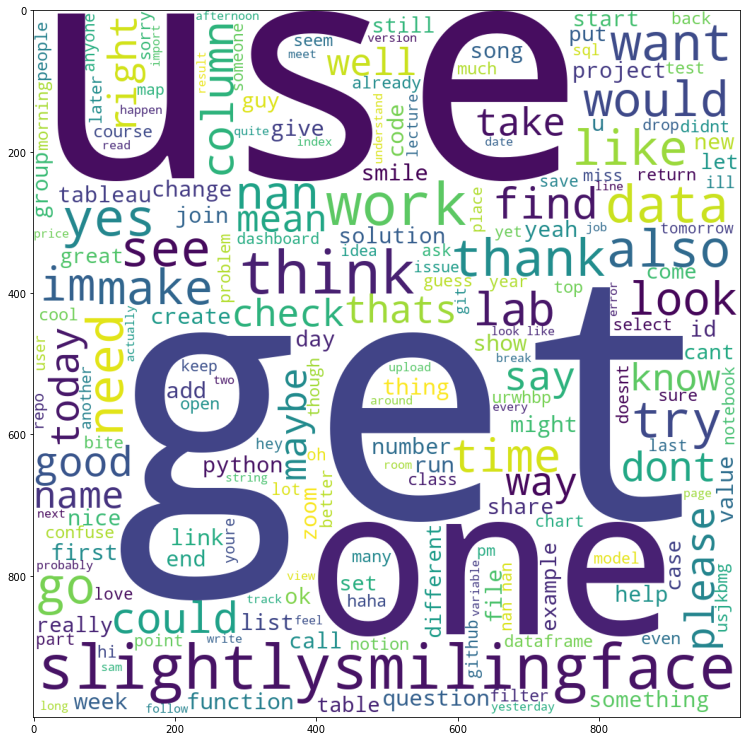

In [73]:
# apply wordcloud function
make_wordcloud(df_train['prep_text'])

## Topic Modelling
Use TF-IDF Vectorization to create a vectorized document term matrix

### Preprocessing

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [76]:
dtm = tfidf.fit_transform(df_train['prep_text'])

In [77]:
df_train['prep_text']

0                                 hang tell add education
1       improve score add metric achievement use synon...
2       feel like slave dumb resume word algorithm sim...
3           francisco remove fancybeautiful format upload
4                                                   ah ok
                              ...                        
4935                                            saw thank
4936    ill think need develop strategy get python thi...
4937                         heeeellpppanyone ursrend eye
4938                                  look presentation v
4939    quite like kaggle explanation read even quite ...
Name: prep_text, Length: 4940, dtype: object

### Non-negative Matrix Factorization

Using Scikit-Learn create an instance of NMF with 20 expected components.

In [78]:
from sklearn.decomposition import NMF

In [79]:
nmf_model = NMF(n_components=20,random_state=42)

In [80]:
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=20, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

### 15 most common words for each of the 20 topics

In [81]:
len(tfidf.get_feature_names())

2574

In [82]:
import random

In [86]:
for i in range(20):
    random_word_id = random.randint(0,3301)
    print(tfidf.get_feature_names()[random_word_id])

morris
overview


IndexError: list index out of range

In [ ]:
single_topic = nmf_model.components_[0]

In [ ]:
# Top 15 words for this topic:
single_topic.argsort()[-15:]
top_word_indices = single_topic.argsort()[-15:]

In [ ]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

In [ ]:
# let's view all the 20 topics found.
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

### Attaching Discovered Topic Labels to Original Articles


In [ ]:
dtm

In [ ]:
dtm.shape

In [ ]:
len(df_sent)

In [ ]:
topic_results = nmf_model.transform(dtm)

In [ ]:
topic_results.shape

In [ ]:
df_sent['text_topic'] = topic_results.argmax(axis=1)

In [ ]:
df_sent.head(10)